In [76]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as f

from torch.utils.tensorboard import SummaryWriter

#Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [77]:
#Create Tensorboard Summary Writer

writer = SummaryWriter("runs/mnist")

In [78]:
#Hyper Parameters

# input_size = 28 * 28

# hidden_size = 100

# num_classes = 10

num_epochs = 300

batch_size = 10

learning_rate = 0.001


In [79]:
#Compose transformer

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


Files already downloaded and verified
Files already downloaded and verified
sample examples shapes:  torch.Size([10, 3, 32, 32]) torch.Size([10])


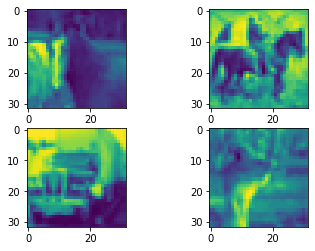

In [80]:
# Import CIFAR10 Data

train_dataset = torchvision.datasets.CIFAR10(root='./datasets/cifar', 
                                           train=True, 
                                           transform= transform, 
                                           download=True
                                          )

test_dataset = torchvision.datasets.CIFAR10(root='.datasets/cifar', 
                                          train = True,
                                          transform = transform,
                                          download = True
                                         )


#Create DataLoader

train_dataloader = torch.utils.data.DataLoader(dataset = train_dataset, 
                                               batch_size=batch_size,
                                               shuffle=True  
                                              )

test_dataloader = torch.utils.data.DataLoader(dataset = test_dataset, 
                                               batch_size=batch_size,
                                               shuffle=True  
                                              )


classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
)



#View Some Samples
examples = iter(train_dataloader)
samples, labels = examples.next()

print("sample examples shapes: ", samples.shape, labels.shape)

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(samples[i][0])

img_grid = torchvision.utils.make_grid(samples)
writer.add_image("CIFAR Sample Images", img_grid)
writer.close()

In [81]:
#Define Convolutional Neural Network

class ConvNeuralNet(nn.Module):
    
    def __init__(self):
        super(ConvNeuralNet, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16*5*5, 150)
        self.fc2 = nn.Linear(150, 84)
        self.fc3 = nn.Linear(84, 10)
        
    
    def forward(self, x):
        x = self.pool1(f.relu(self.conv1(x)))
        x = self.pool2(f.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = f.relu(self.fc3(x))
        return x
    
    
model = ConvNeuralNet().to(device)
#Loss function
criterion = nn.CrossEntropyLoss()

#Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

writer.add_graph(model, samples.to(device))
writer.close()

In [82]:
#training Loop

running_loss = 0
running_correct = 0

for epoch in range(num_epochs):
    for i, (samples, labels) in enumerate(train_dataloader):
        #Prepare Images for Training in 1 dimentional dataset
        samples = samples.to(device)
        labels = labels.to(device)
        
        #compute Forward value
        y_pred = model(samples)
        
        #Compute Loss
        loss = criterion(y_pred, labels)
        
        #Backpropogation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(y_pred.data, 1)
        running_correct += (y_pred == labels).sum().item()
        
        
        if(i+1) %500 == 0:
            print(f'epoch = {epoch+1}/{num_epochs}, i={i+1}/{len(train_dataloader)}, loss = {loss:.4f}')
            writer.add_scalar("training_loss", running_loss / 100, epoch*len(train_dataloader)+i)
            writer.add_scalar("accuracy", running_correct / 100, epoch*len(train_dataloader)+i)
            running_loss = 0.0
            running_correct = 0

epoch = 1/300, i=500/5000, loss = 2.3060
epoch = 1/300, i=1000/5000, loss = 2.2981
epoch = 1/300, i=1500/5000, loss = 2.3070
epoch = 1/300, i=2000/5000, loss = 2.2996
epoch = 1/300, i=2500/5000, loss = 2.2951
epoch = 1/300, i=3000/5000, loss = 2.3091
epoch = 1/300, i=3500/5000, loss = 2.3061
epoch = 1/300, i=4000/5000, loss = 2.3049
epoch = 1/300, i=4500/5000, loss = 2.2950
epoch = 1/300, i=5000/5000, loss = 2.2949
epoch = 2/300, i=500/5000, loss = 2.3092
epoch = 2/300, i=1000/5000, loss = 2.3081
epoch = 2/300, i=1500/5000, loss = 2.3114
epoch = 2/300, i=2000/5000, loss = 2.2974
epoch = 2/300, i=2500/5000, loss = 2.3014
epoch = 2/300, i=3000/5000, loss = 2.2987
epoch = 2/300, i=3500/5000, loss = 2.2984
epoch = 2/300, i=4000/5000, loss = 2.2972
epoch = 2/300, i=4500/5000, loss = 2.3034
epoch = 2/300, i=5000/5000, loss = 2.2961
epoch = 3/300, i=500/5000, loss = 2.2927
epoch = 3/300, i=1000/5000, loss = 2.2929
epoch = 3/300, i=1500/5000, loss = 2.3033
epoch = 3/300, i=2000/5000, loss = 2.

epoch = 20/300, i=2500/5000, loss = 1.7363
epoch = 20/300, i=3000/5000, loss = 1.4334
epoch = 20/300, i=3500/5000, loss = 1.7391
epoch = 20/300, i=4000/5000, loss = 1.4788
epoch = 20/300, i=4500/5000, loss = 0.9877
epoch = 20/300, i=5000/5000, loss = 1.1593
epoch = 21/300, i=500/5000, loss = 1.6167
epoch = 21/300, i=1000/5000, loss = 1.4801
epoch = 21/300, i=1500/5000, loss = 1.2872
epoch = 21/300, i=2000/5000, loss = 1.2518
epoch = 21/300, i=2500/5000, loss = 2.0268
epoch = 21/300, i=3000/5000, loss = 1.9810
epoch = 21/300, i=3500/5000, loss = 1.4122
epoch = 21/300, i=4000/5000, loss = 0.7564
epoch = 21/300, i=4500/5000, loss = 1.8178
epoch = 21/300, i=5000/5000, loss = 1.3719
epoch = 22/300, i=500/5000, loss = 1.3412
epoch = 22/300, i=1000/5000, loss = 1.8689
epoch = 22/300, i=1500/5000, loss = 1.7818
epoch = 22/300, i=2000/5000, loss = 2.2261
epoch = 22/300, i=2500/5000, loss = 0.9335
epoch = 22/300, i=3000/5000, loss = 1.4599
epoch = 22/300, i=3500/5000, loss = 1.4611
epoch = 22/30

epoch = 39/300, i=3000/5000, loss = 1.6152
epoch = 39/300, i=3500/5000, loss = 1.7659
epoch = 39/300, i=4000/5000, loss = 1.9099
epoch = 39/300, i=4500/5000, loss = 1.3477
epoch = 39/300, i=5000/5000, loss = 1.1964
epoch = 40/300, i=500/5000, loss = 0.6879
epoch = 40/300, i=1000/5000, loss = 1.4135
epoch = 40/300, i=1500/5000, loss = 1.5634
epoch = 40/300, i=2000/5000, loss = 0.5009
epoch = 40/300, i=2500/5000, loss = 0.9060
epoch = 40/300, i=3000/5000, loss = 0.9343
epoch = 40/300, i=3500/5000, loss = 0.5354
epoch = 40/300, i=4000/5000, loss = 0.9415
epoch = 40/300, i=4500/5000, loss = 0.5245
epoch = 40/300, i=5000/5000, loss = 0.7301
epoch = 41/300, i=500/5000, loss = 1.4309
epoch = 41/300, i=1000/5000, loss = 1.0640
epoch = 41/300, i=1500/5000, loss = 1.0297
epoch = 41/300, i=2000/5000, loss = 0.6519
epoch = 41/300, i=2500/5000, loss = 1.4211
epoch = 41/300, i=3000/5000, loss = 0.8868
epoch = 41/300, i=3500/5000, loss = 0.6306
epoch = 41/300, i=4000/5000, loss = 1.2408
epoch = 41/30

epoch = 58/300, i=3500/5000, loss = 0.4481
epoch = 58/300, i=4000/5000, loss = 1.5935
epoch = 58/300, i=4500/5000, loss = 0.8299
epoch = 58/300, i=5000/5000, loss = 0.7983
epoch = 59/300, i=500/5000, loss = 0.5182
epoch = 59/300, i=1000/5000, loss = 0.9117
epoch = 59/300, i=1500/5000, loss = 1.2012
epoch = 59/300, i=2000/5000, loss = 1.3437
epoch = 59/300, i=2500/5000, loss = 0.7786
epoch = 59/300, i=3000/5000, loss = 0.4349
epoch = 59/300, i=3500/5000, loss = 0.8015
epoch = 59/300, i=4000/5000, loss = 0.4980
epoch = 59/300, i=4500/5000, loss = 0.8345
epoch = 59/300, i=5000/5000, loss = 0.5961
epoch = 60/300, i=500/5000, loss = 0.7171
epoch = 60/300, i=1000/5000, loss = 0.9830
epoch = 60/300, i=1500/5000, loss = 0.5522
epoch = 60/300, i=2000/5000, loss = 1.0433
epoch = 60/300, i=2500/5000, loss = 0.5867
epoch = 60/300, i=3000/5000, loss = 0.8381
epoch = 60/300, i=3500/5000, loss = 0.8462
epoch = 60/300, i=4000/5000, loss = 0.7629
epoch = 60/300, i=4500/5000, loss = 0.4457
epoch = 60/30

epoch = 77/300, i=4000/5000, loss = 0.6726
epoch = 77/300, i=4500/5000, loss = 1.0253
epoch = 77/300, i=5000/5000, loss = 0.7581
epoch = 78/300, i=500/5000, loss = 0.9195
epoch = 78/300, i=1000/5000, loss = 0.7029
epoch = 78/300, i=1500/5000, loss = 0.9043
epoch = 78/300, i=2000/5000, loss = 0.4537
epoch = 78/300, i=2500/5000, loss = 0.5131
epoch = 78/300, i=3000/5000, loss = 0.1863
epoch = 78/300, i=3500/5000, loss = 0.6069
epoch = 78/300, i=4000/5000, loss = 0.4844
epoch = 78/300, i=4500/5000, loss = 0.2273
epoch = 78/300, i=5000/5000, loss = 0.6955
epoch = 79/300, i=500/5000, loss = 0.9867
epoch = 79/300, i=1000/5000, loss = 1.1394
epoch = 79/300, i=1500/5000, loss = 0.4120
epoch = 79/300, i=2000/5000, loss = 0.4843
epoch = 79/300, i=2500/5000, loss = 0.2510
epoch = 79/300, i=3000/5000, loss = 0.7279
epoch = 79/300, i=3500/5000, loss = 0.3154
epoch = 79/300, i=4000/5000, loss = 0.2416
epoch = 79/300, i=4500/5000, loss = 0.2397
epoch = 79/300, i=5000/5000, loss = 0.7062
epoch = 80/30

epoch = 96/300, i=4500/5000, loss = 0.7156
epoch = 96/300, i=5000/5000, loss = 0.1411
epoch = 97/300, i=500/5000, loss = 0.2460
epoch = 97/300, i=1000/5000, loss = 0.5853
epoch = 97/300, i=1500/5000, loss = 0.7608
epoch = 97/300, i=2000/5000, loss = 0.6599
epoch = 97/300, i=2500/5000, loss = 0.8066
epoch = 97/300, i=3000/5000, loss = 0.4115
epoch = 97/300, i=3500/5000, loss = 0.3705
epoch = 97/300, i=4000/5000, loss = 0.1509
epoch = 97/300, i=4500/5000, loss = 0.5709
epoch = 97/300, i=5000/5000, loss = 0.2598
epoch = 98/300, i=500/5000, loss = 0.9308
epoch = 98/300, i=1000/5000, loss = 0.1781
epoch = 98/300, i=1500/5000, loss = 0.5244
epoch = 98/300, i=2000/5000, loss = 0.2476
epoch = 98/300, i=2500/5000, loss = 0.6335
epoch = 98/300, i=3000/5000, loss = 0.4471
epoch = 98/300, i=3500/5000, loss = 0.8051
epoch = 98/300, i=4000/5000, loss = 0.9454
epoch = 98/300, i=4500/5000, loss = 0.9157
epoch = 98/300, i=5000/5000, loss = 0.6137
epoch = 99/300, i=500/5000, loss = 0.1997
epoch = 99/300

epoch = 115/300, i=3500/5000, loss = 0.2278
epoch = 115/300, i=4000/5000, loss = 0.2831
epoch = 115/300, i=4500/5000, loss = 0.1767
epoch = 115/300, i=5000/5000, loss = 0.0971
epoch = 116/300, i=500/5000, loss = 0.6726
epoch = 116/300, i=1000/5000, loss = 0.3997
epoch = 116/300, i=1500/5000, loss = 0.1583
epoch = 116/300, i=2000/5000, loss = 0.5428
epoch = 116/300, i=2500/5000, loss = 0.3246
epoch = 116/300, i=3000/5000, loss = 0.3463
epoch = 116/300, i=3500/5000, loss = 0.6825
epoch = 116/300, i=4000/5000, loss = 0.5390
epoch = 116/300, i=4500/5000, loss = 0.6371
epoch = 116/300, i=5000/5000, loss = 0.5022
epoch = 117/300, i=500/5000, loss = 0.2659
epoch = 117/300, i=1000/5000, loss = 0.1185
epoch = 117/300, i=1500/5000, loss = 0.7185
epoch = 117/300, i=2000/5000, loss = 0.3012
epoch = 117/300, i=2500/5000, loss = 0.2680
epoch = 117/300, i=3000/5000, loss = 0.3483
epoch = 117/300, i=3500/5000, loss = 0.3360
epoch = 117/300, i=4000/5000, loss = 0.6094
epoch = 117/300, i=4500/5000, loss

epoch = 134/300, i=2000/5000, loss = 0.1463
epoch = 134/300, i=2500/5000, loss = 0.0376
epoch = 134/300, i=3000/5000, loss = 0.0205
epoch = 134/300, i=3500/5000, loss = 0.0321
epoch = 134/300, i=4000/5000, loss = 0.1217
epoch = 134/300, i=4500/5000, loss = 0.3267
epoch = 134/300, i=5000/5000, loss = 0.3067
epoch = 135/300, i=500/5000, loss = 0.0330
epoch = 135/300, i=1000/5000, loss = 0.1484
epoch = 135/300, i=1500/5000, loss = 0.5282
epoch = 135/300, i=2000/5000, loss = 0.2456
epoch = 135/300, i=2500/5000, loss = 0.1910
epoch = 135/300, i=3000/5000, loss = 0.3370
epoch = 135/300, i=3500/5000, loss = 0.1515
epoch = 135/300, i=4000/5000, loss = 0.3179
epoch = 135/300, i=4500/5000, loss = 0.0342
epoch = 135/300, i=5000/5000, loss = 0.3008
epoch = 136/300, i=500/5000, loss = 0.2242
epoch = 136/300, i=1000/5000, loss = 0.2829
epoch = 136/300, i=1500/5000, loss = 0.3889
epoch = 136/300, i=2000/5000, loss = 0.1418
epoch = 136/300, i=2500/5000, loss = 0.3487
epoch = 136/300, i=3000/5000, loss

epoch = 153/300, i=500/5000, loss = 0.0252
epoch = 153/300, i=1000/5000, loss = 0.0875
epoch = 153/300, i=1500/5000, loss = 0.1102
epoch = 153/300, i=2000/5000, loss = 0.0435
epoch = 153/300, i=2500/5000, loss = 0.0075
epoch = 153/300, i=3000/5000, loss = 0.2184
epoch = 153/300, i=3500/5000, loss = 0.5422
epoch = 153/300, i=4000/5000, loss = 0.0550
epoch = 153/300, i=4500/5000, loss = 0.5040
epoch = 153/300, i=5000/5000, loss = 0.2956
epoch = 154/300, i=500/5000, loss = 0.1083
epoch = 154/300, i=1000/5000, loss = 0.2290
epoch = 154/300, i=1500/5000, loss = 0.0674
epoch = 154/300, i=2000/5000, loss = 0.0623
epoch = 154/300, i=2500/5000, loss = 0.0525
epoch = 154/300, i=3000/5000, loss = 0.0640
epoch = 154/300, i=3500/5000, loss = 0.0629
epoch = 154/300, i=4000/5000, loss = 0.1862
epoch = 154/300, i=4500/5000, loss = 0.0877
epoch = 154/300, i=5000/5000, loss = 0.1355
epoch = 155/300, i=500/5000, loss = 0.1234
epoch = 155/300, i=1000/5000, loss = 0.2571
epoch = 155/300, i=1500/5000, loss 

epoch = 171/300, i=4000/5000, loss = 0.0345
epoch = 171/300, i=4500/5000, loss = 0.0630
epoch = 171/300, i=5000/5000, loss = 0.0011
epoch = 172/300, i=500/5000, loss = 0.2415
epoch = 172/300, i=1000/5000, loss = 0.0387
epoch = 172/300, i=1500/5000, loss = 0.2396
epoch = 172/300, i=2000/5000, loss = 0.0933
epoch = 172/300, i=2500/5000, loss = 0.3147
epoch = 172/300, i=3000/5000, loss = 0.0617
epoch = 172/300, i=3500/5000, loss = 0.0131
epoch = 172/300, i=4000/5000, loss = 0.0551
epoch = 172/300, i=4500/5000, loss = 0.2991
epoch = 172/300, i=5000/5000, loss = 0.0058
epoch = 173/300, i=500/5000, loss = 0.0123
epoch = 173/300, i=1000/5000, loss = 0.5871
epoch = 173/300, i=1500/5000, loss = 0.0436
epoch = 173/300, i=2000/5000, loss = 0.6834
epoch = 173/300, i=2500/5000, loss = 0.0308
epoch = 173/300, i=3000/5000, loss = 0.7917
epoch = 173/300, i=3500/5000, loss = 0.3388
epoch = 173/300, i=4000/5000, loss = 0.0646
epoch = 173/300, i=4500/5000, loss = 0.4053
epoch = 173/300, i=5000/5000, loss

epoch = 190/300, i=2500/5000, loss = 0.0094
epoch = 190/300, i=3000/5000, loss = 0.0129
epoch = 190/300, i=3500/5000, loss = 0.1665
epoch = 190/300, i=4000/5000, loss = 0.0216
epoch = 190/300, i=4500/5000, loss = 0.2803
epoch = 190/300, i=5000/5000, loss = 0.0393
epoch = 191/300, i=500/5000, loss = 0.0220
epoch = 191/300, i=1000/5000, loss = 0.0190
epoch = 191/300, i=1500/5000, loss = 0.0231
epoch = 191/300, i=2000/5000, loss = 0.0766
epoch = 191/300, i=2500/5000, loss = 0.3098
epoch = 191/300, i=3000/5000, loss = 0.0007
epoch = 191/300, i=3500/5000, loss = 0.0198
epoch = 191/300, i=4000/5000, loss = 0.1519
epoch = 191/300, i=4500/5000, loss = 0.0342
epoch = 191/300, i=5000/5000, loss = 0.0274
epoch = 192/300, i=500/5000, loss = 0.0576
epoch = 192/300, i=1000/5000, loss = 0.2315
epoch = 192/300, i=1500/5000, loss = 0.0058
epoch = 192/300, i=2000/5000, loss = 0.0194
epoch = 192/300, i=2500/5000, loss = 0.0040
epoch = 192/300, i=3000/5000, loss = 0.0037
epoch = 192/300, i=3500/5000, loss

epoch = 209/300, i=1000/5000, loss = 0.0077
epoch = 209/300, i=1500/5000, loss = 0.0041
epoch = 209/300, i=2000/5000, loss = 0.0035
epoch = 209/300, i=2500/5000, loss = 0.0017
epoch = 209/300, i=3000/5000, loss = 0.0033
epoch = 209/300, i=3500/5000, loss = 0.0006
epoch = 209/300, i=4000/5000, loss = 0.0049
epoch = 209/300, i=4500/5000, loss = 0.0046
epoch = 209/300, i=5000/5000, loss = 0.0136
epoch = 210/300, i=500/5000, loss = 0.0028
epoch = 210/300, i=1000/5000, loss = 0.0018
epoch = 210/300, i=1500/5000, loss = 0.0039
epoch = 210/300, i=2000/5000, loss = 0.0041
epoch = 210/300, i=2500/5000, loss = 0.0014
epoch = 210/300, i=3000/5000, loss = 0.0010
epoch = 210/300, i=3500/5000, loss = 0.0029
epoch = 210/300, i=4000/5000, loss = 0.0024
epoch = 210/300, i=4500/5000, loss = 0.0130
epoch = 210/300, i=5000/5000, loss = 0.0012
epoch = 211/300, i=500/5000, loss = 0.2349
epoch = 211/300, i=1000/5000, loss = 0.0035
epoch = 211/300, i=1500/5000, loss = 0.0027
epoch = 211/300, i=2000/5000, loss

epoch = 227/300, i=4500/5000, loss = 0.0019
epoch = 227/300, i=5000/5000, loss = 0.0015
epoch = 228/300, i=500/5000, loss = 0.0025
epoch = 228/300, i=1000/5000, loss = 0.2330
epoch = 228/300, i=1500/5000, loss = 0.0076
epoch = 228/300, i=2000/5000, loss = 0.0036
epoch = 228/300, i=2500/5000, loss = 0.0009
epoch = 228/300, i=3000/5000, loss = 0.0005
epoch = 228/300, i=3500/5000, loss = 0.0016
epoch = 228/300, i=4000/5000, loss = 0.0029
epoch = 228/300, i=4500/5000, loss = 0.0006
epoch = 228/300, i=5000/5000, loss = 0.0014
epoch = 229/300, i=500/5000, loss = 0.0014
epoch = 229/300, i=1000/5000, loss = 0.0079
epoch = 229/300, i=1500/5000, loss = 0.0024
epoch = 229/300, i=2000/5000, loss = 0.0036
epoch = 229/300, i=2500/5000, loss = 0.0018
epoch = 229/300, i=3000/5000, loss = 0.0037
epoch = 229/300, i=3500/5000, loss = 0.0042
epoch = 229/300, i=4000/5000, loss = 0.0019
epoch = 229/300, i=4500/5000, loss = 0.0005
epoch = 229/300, i=5000/5000, loss = 0.2368
epoch = 230/300, i=500/5000, loss 

epoch = 246/300, i=3000/5000, loss = 0.0008
epoch = 246/300, i=3500/5000, loss = 0.0011
epoch = 246/300, i=4000/5000, loss = 0.2326
epoch = 246/300, i=4500/5000, loss = 0.0008
epoch = 246/300, i=5000/5000, loss = 0.0014
epoch = 247/300, i=500/5000, loss = 0.0018
epoch = 247/300, i=1000/5000, loss = 0.0001
epoch = 247/300, i=1500/5000, loss = 0.0037
epoch = 247/300, i=2000/5000, loss = 0.0005
epoch = 247/300, i=2500/5000, loss = 0.0041
epoch = 247/300, i=3000/5000, loss = 0.0002
epoch = 247/300, i=3500/5000, loss = 0.0002
epoch = 247/300, i=4000/5000, loss = 0.0017
epoch = 247/300, i=4500/5000, loss = 0.0033
epoch = 247/300, i=5000/5000, loss = 0.0025
epoch = 248/300, i=500/5000, loss = 0.0006
epoch = 248/300, i=1000/5000, loss = 0.0004
epoch = 248/300, i=1500/5000, loss = 0.0005
epoch = 248/300, i=2000/5000, loss = 0.0013
epoch = 248/300, i=2500/5000, loss = 0.0015
epoch = 248/300, i=3000/5000, loss = 0.0024
epoch = 248/300, i=3500/5000, loss = 0.0015
epoch = 248/300, i=4000/5000, loss

epoch = 265/300, i=1500/5000, loss = 0.0009
epoch = 265/300, i=2000/5000, loss = 0.0007
epoch = 265/300, i=2500/5000, loss = 0.0008
epoch = 265/300, i=3000/5000, loss = 0.0012
epoch = 265/300, i=3500/5000, loss = 0.0018
epoch = 265/300, i=4000/5000, loss = 0.0002
epoch = 265/300, i=4500/5000, loss = 0.0008
epoch = 265/300, i=5000/5000, loss = 0.0006
epoch = 266/300, i=500/5000, loss = 0.0009
epoch = 266/300, i=1000/5000, loss = 0.0001
epoch = 266/300, i=1500/5000, loss = 0.0009
epoch = 266/300, i=2000/5000, loss = 0.0005
epoch = 266/300, i=2500/5000, loss = 0.0012
epoch = 266/300, i=3000/5000, loss = 0.0003
epoch = 266/300, i=3500/5000, loss = 0.0007
epoch = 266/300, i=4000/5000, loss = 0.0001
epoch = 266/300, i=4500/5000, loss = 0.0008
epoch = 266/300, i=5000/5000, loss = 0.0010
epoch = 267/300, i=500/5000, loss = 0.0024
epoch = 267/300, i=1000/5000, loss = 0.0009
epoch = 267/300, i=1500/5000, loss = 0.0012
epoch = 267/300, i=2000/5000, loss = 0.0001
epoch = 267/300, i=2500/5000, loss

epoch = 283/300, i=5000/5000, loss = 0.0030
epoch = 284/300, i=500/5000, loss = 0.0008
epoch = 284/300, i=1000/5000, loss = 0.0013
epoch = 284/300, i=1500/5000, loss = 0.0007
epoch = 284/300, i=2000/5000, loss = 0.2324
epoch = 284/300, i=2500/5000, loss = 0.0004
epoch = 284/300, i=3000/5000, loss = 0.0000
epoch = 284/300, i=3500/5000, loss = 0.0014
epoch = 284/300, i=4000/5000, loss = 0.0006
epoch = 284/300, i=4500/5000, loss = 0.0010
epoch = 284/300, i=5000/5000, loss = 0.0002
epoch = 285/300, i=500/5000, loss = 0.0007
epoch = 285/300, i=1000/5000, loss = 0.0012
epoch = 285/300, i=1500/5000, loss = 0.0017
epoch = 285/300, i=2000/5000, loss = 0.0004
epoch = 285/300, i=2500/5000, loss = 0.0013
epoch = 285/300, i=3000/5000, loss = 0.0011
epoch = 285/300, i=3500/5000, loss = 0.0012
epoch = 285/300, i=4000/5000, loss = 0.0003
epoch = 285/300, i=4500/5000, loss = 0.0010
epoch = 285/300, i=5000/5000, loss = 0.0006
epoch = 286/300, i=500/5000, loss = 0.0002
epoch = 286/300, i=1000/5000, loss 

In [83]:
#Testing datasets

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    for samples, labels in test_dataloader:
        samples = samples.to(device)
        labels = labels.to(device)
        predictions = model(samples)
        
        _, predictions = torch.max(predictions, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy: {acc:.4f}%')


accuracy: 99.3140%
